In [1]:
from fastai import *
from fastai.imports import *
from fastai.vision import *
import matplotlib.pyplot as plt

In [2]:
import os
PATH = "./datas"

os.listdir(PATH)

['addidas', 'nike', 'chelsea_boot']

In [3]:
data = ImageDataBunch.from_folder(PATH, ds_tfms=get_transforms(), size=224,bs=20,valid_pct=0.1).normalize(imagenet_stats)

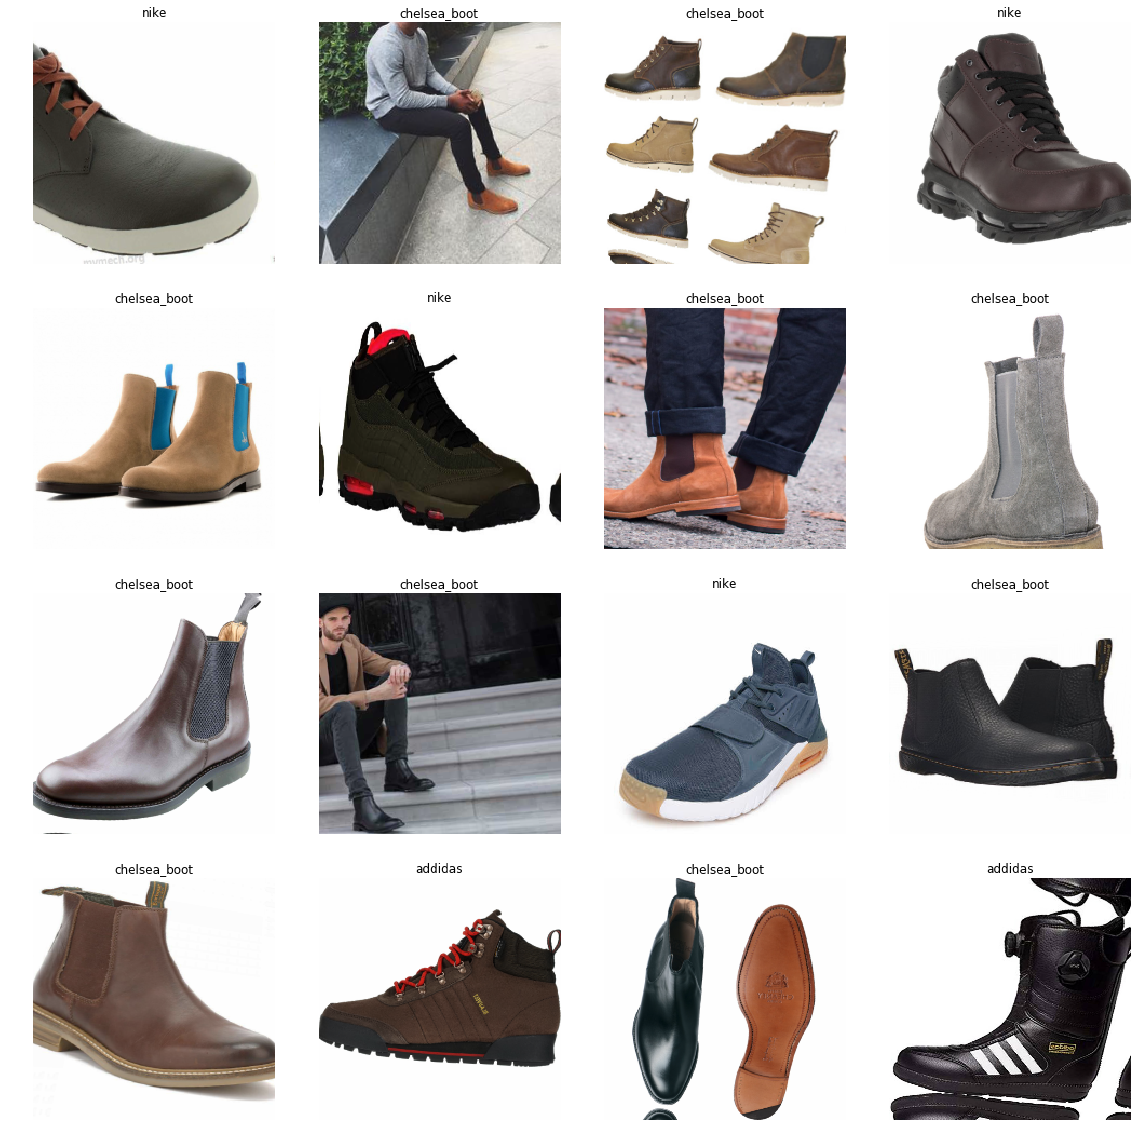

In [4]:
data.show_batch(rows=4)

In [5]:
print(data.classes)

['addidas', 'chelsea_boot', 'nike']


In [6]:
learn = create_cnn(data,models.resnet34,metrics=accuracy)

In [7]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy
1,0.915788,0.250296,0.906667
2,0.570533,0.223729,0.920000
3,0.401978,0.192456,0.946667
4,0.311104,0.189652,0.946667


In [8]:
learn.save("shoe_brand")
# learn.load("shoe")

In [9]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()
len(data.valid_ds)==len(losses)==len(idxs)

True

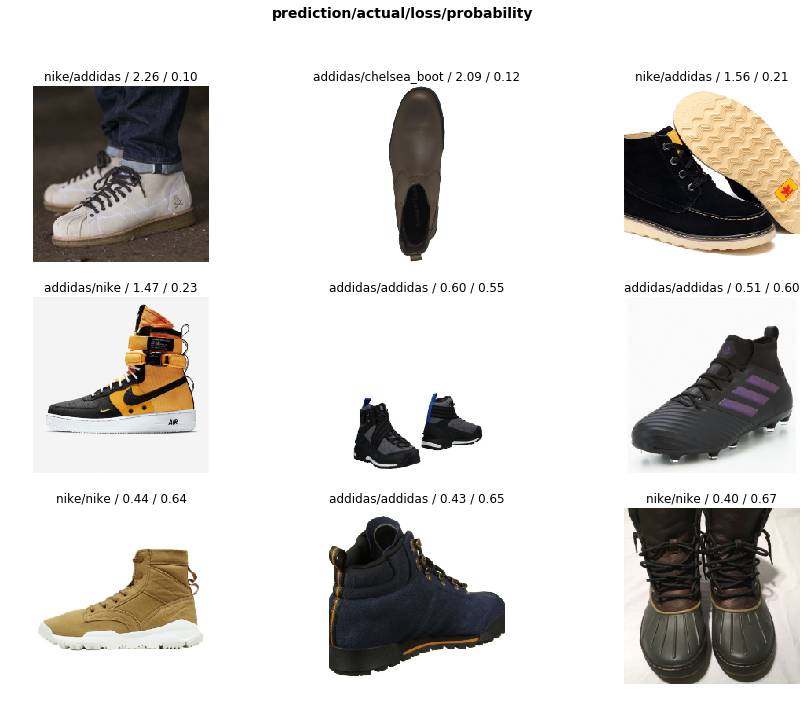

In [10]:
interp.plot_top_losses(9,figsize=(15,11))

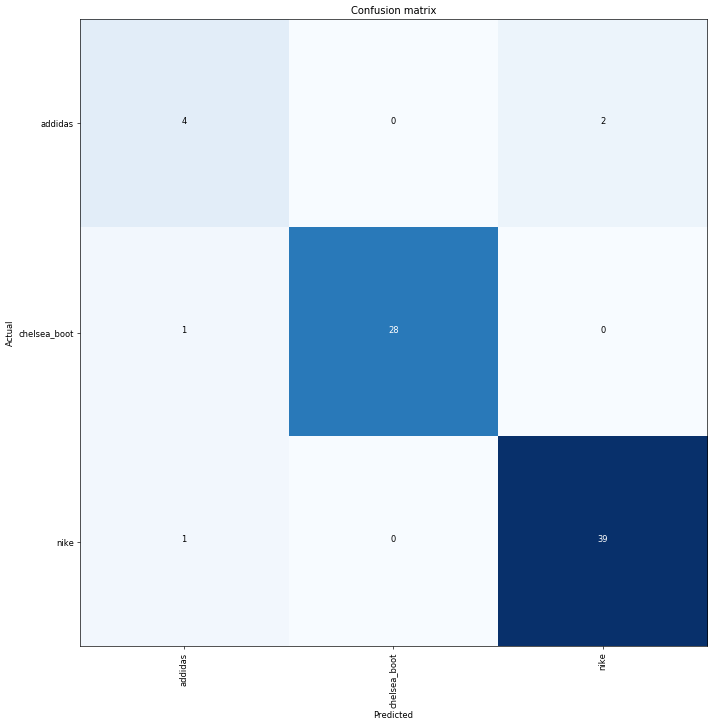

In [11]:
interp.plot_confusion_matrix(figsize=(12,12),dpi=60)

In [12]:
learn.unfreeze()

In [13]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,accuracy
1,0.513477,0.497234,0.866667


In [14]:
learn.load("shoe_brand");

In [15]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


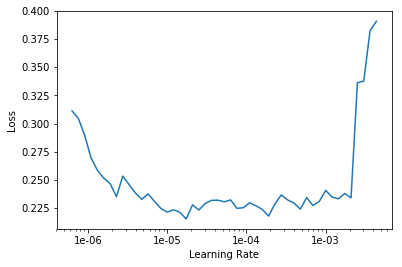

In [16]:
learn.recorder.plot()

In [19]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-5,1e-4))

epoch,train_loss,valid_loss,accuracy
1,0.219853,0.154877,0.960000
2,0.201570,0.153564,0.973333


In [20]:
learn.save("shoe_brand2")

In [19]:
m = learn.model

In [22]:
f = m[1]

In [28]:
ch = m.children

In [ ]:
ch.